## BÀI TẬP VỀ NHÀ BUỔI 4
### Bài Tập 2:

Chọn phương pháp biến đổi ảnh:
F - Fast Fourier
L - Butterworth Lowpass Filter
H - Butterworth Highpass Filter


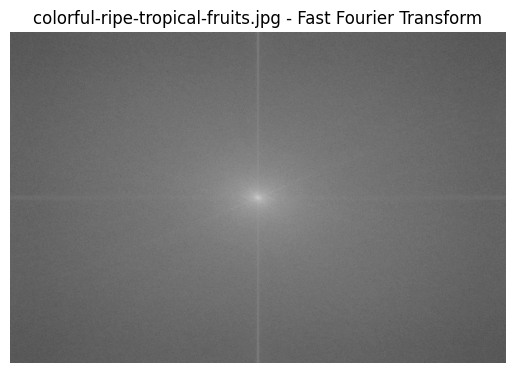

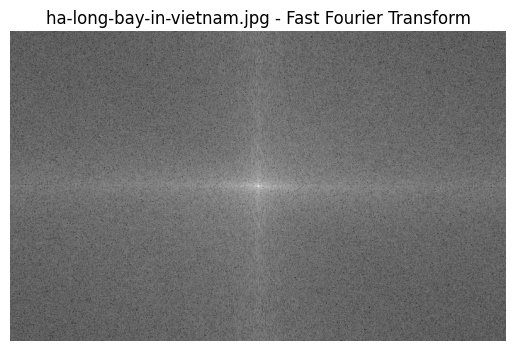

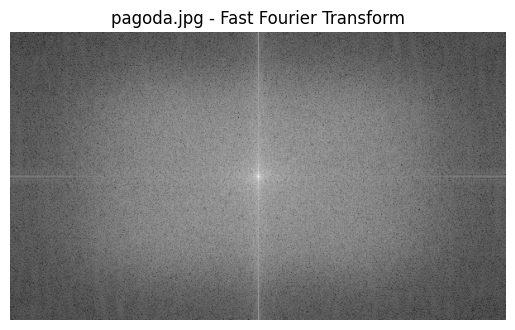

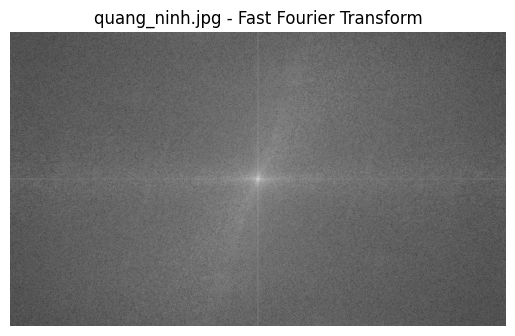

In [15]:
from PIL import Image
import numpy as np
import scipy.fft
import matplotlib.pyplot as plt
import os

def fast_fourier_transform(img_gray):
    f = scipy.fft.fft2(img_gray)
    fshift = scipy.fft.fftshift(f)
    magnitude = np.log(np.abs(fshift) + 1)
    magnitude = (magnitude - magnitude.min()) / (magnitude.max() - magnitude.min()) * 255
    return magnitude.astype(np.uint8)

def butterworth_filter(img_gray, cutoff=30, order=2, highpass=False):
    rows, cols = img_gray.shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows) - crow
    v = np.arange(cols) - ccol
    U, V = np.meshgrid(u, v, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    if highpass:
        H = 1 / (1 + (cutoff / (D + 1e-5))**(2 * order))
    else:
        H = 1 / (1 + (D / cutoff)**(2 * order))
    f = scipy.fft.fft2(img_gray)
    fshift = scipy.fft.fftshift(f)
    filtered = fshift * H
    f_ishift = scipy.fft.ifftshift(filtered)
    img_back = scipy.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    img_back = (img_back - img_back.min()) / (img_back.max() - img_back.min()) * 255
    return img_back.astype(np.uint8)

def process_images(mode):
    input_folder = "exercise"
    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            path = os.path.join(input_folder, filename)
            img = Image.open(path).convert("L")
            img_gray = np.array(img)

            if mode == 'F':
                result = fast_fourier_transform(img_gray)
                title = "Fast Fourier Transform"
            elif mode == 'L':
                result = butterworth_filter(img_gray, highpass=False)
                title = "Butterworth Lowpass Filter"
            elif mode == 'H':
                result = butterworth_filter(img_gray, highpass=True)
                title = "Butterworth Highpass Filter"
            else:
                print("Lựa chọn không hợp lệ.")
                return

            plt.imshow(result, cmap='gray')
            plt.title(f"{filename} - {title}")
            plt.axis('off')
            plt.show()

def main():
    print("Chọn phương pháp biến đổi ảnh:")
    print("F - Fast Fourier")
    print("L - Butterworth Lowpass Filter")
    print("H - Butterworth Highpass Filter")
    key = input("Nhấn phím (F/L/H): ").upper()
    if key in ['F', 'L', 'H']:
        process_images(key)
    else:
        print("Lựa chọn không hợp lệ")

if __name__ == "__main__":
    main()


### Bài Tập 3:

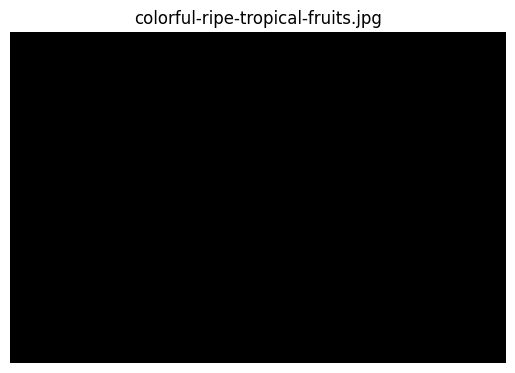

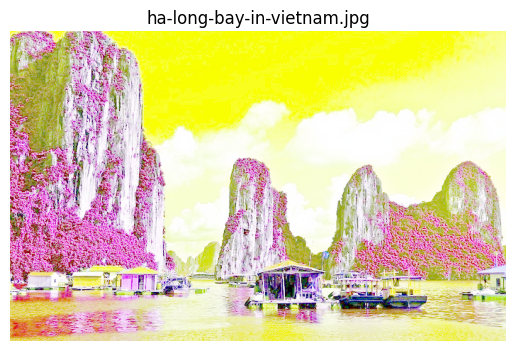

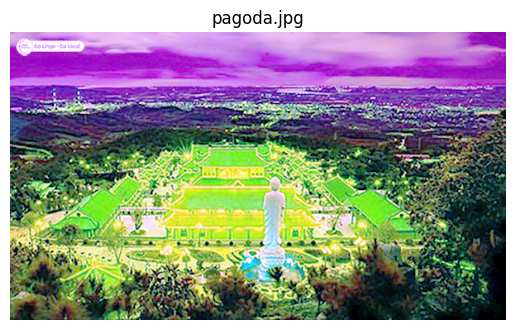

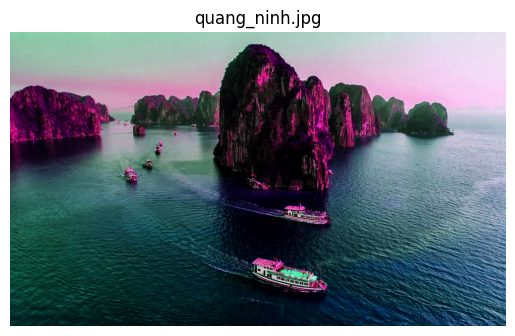

In [ ]:
from PIL import Image
import math
import numpy as np
import scipy.fft
import imageio.v2 as iio
import matplotlib.pylab as plt
import os
import random

def inverse(img):
    return 255 - img

def gamma_correction(img, gamma=2.0):
    img_norm = img / 255.0
    corrected = np.power(img_norm, gamma)
    return (corrected * 255).astype(np.uint8)

def log_transform(img):
    img_float = img.astype(np.float32)
    c = 255 / np.log(1 + np.max(img_float))
    log_img = c * np.log(1 + img_float)
    return np.clip(log_img, 0, 255).astype(np.uint8)

def histogram_equalization(img):
    out = np.zeros_like(img)
    for i in range(3):
        hist, _ = np.histogram(img[..., i], bins=256, range=(0, 256))
        cdf = hist.cumsum()
        cdf = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
        cdf = np.clip(cdf, 0, 255).astype(np.uint8)
        out[..., i] = cdf[img[..., i]]
    return out

def contrast_stretching(img):
    out = np.zeros_like(img)
    for i in range(3):
        min_val = np.min(img[..., i])
        max_val = np.max(img[..., i])
        out[..., i] = (img[..., i] - min_val) * 255 / (max_val - min_val + 1e-5)
    return out.astype(np.uint8)

def apply_random_transformation(img):
    transformations = [inverse, gamma_correction, log_transform, histogram_equalization, contrast_stretching]
    func = random.choice(transformations)
    return func(img)

def shuffle_rgb(img):
    channels = [0, 1, 2]
    random.shuffle(channels)
    return img[..., channels]

def process_images():
    input_folder = "exercise"

    for filename in os.listdir(input_folder):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            path = os.path.join(input_folder, filename)
            img = iio.imread(path)
            if img.ndim == 2:
                img = np.stack([img]*3, axis=-1)

            shuffled = shuffle_rgb(img)
            transformed = apply_random_transformation(shuffled)

            plt.imshow(transformed)
            plt.title(f"{filename}")
            plt.axis('off')
            plt.show()

process_images()
